In [3]:
import pandas as pd
import os, glob
import datetime
import numpy as np
import csv

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylustrator

plt.style.use('datafantic-right.mplstyle')

In [4]:
dostoevsky_data = pd.read_csv(r'Полный датасет.csv', index_col=0) # encoding = 'utf-16', delimiter='\t'

In [105]:
dostoevsky_data = dostoevsky_data[dostoevsky_data['Год'] != 2009]

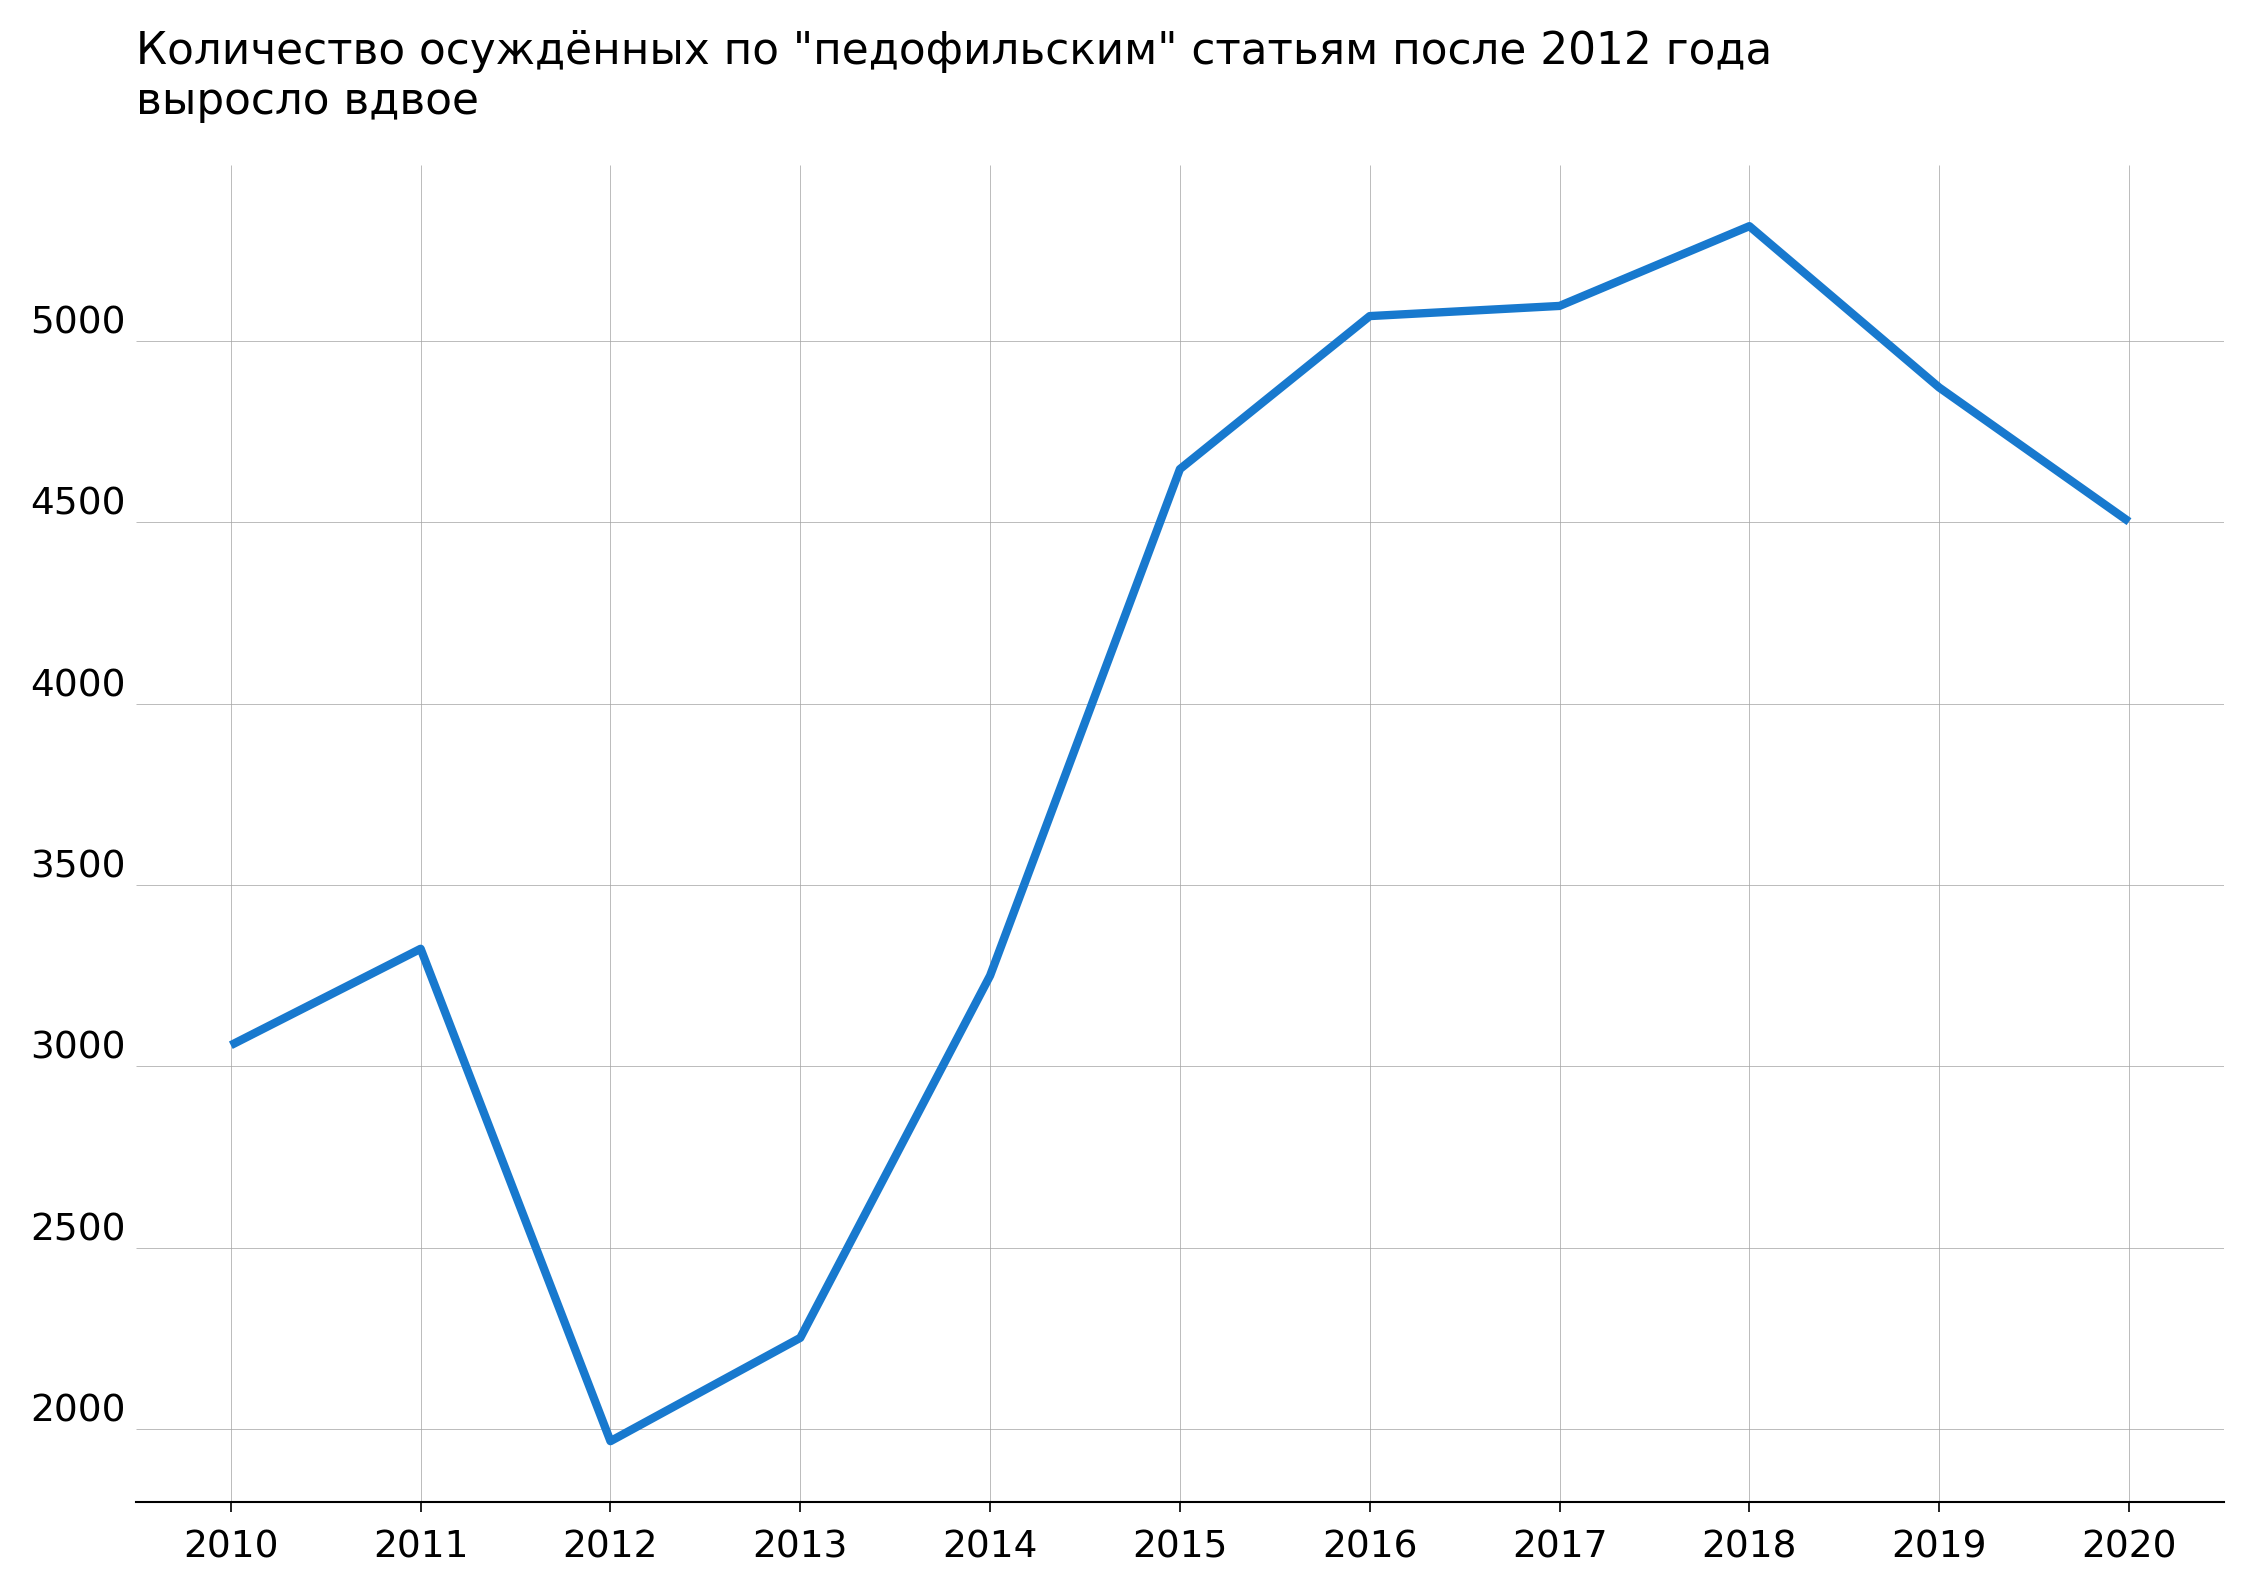

In [106]:
dostoevsky_data.groupby('Год')['Всего осуждено'].sum().plot()
plt.title('Количество осуждённых по "педофильским" статьям после 2012 года \nвыросло вдвое',
          fontsize=21, fontweight=None)
plt.xticks(np.unique(dostoevsky_data['Год']))
plt.xlabel(None)
plt.savefig("all_articles.svg", format="svg")
plt.show()

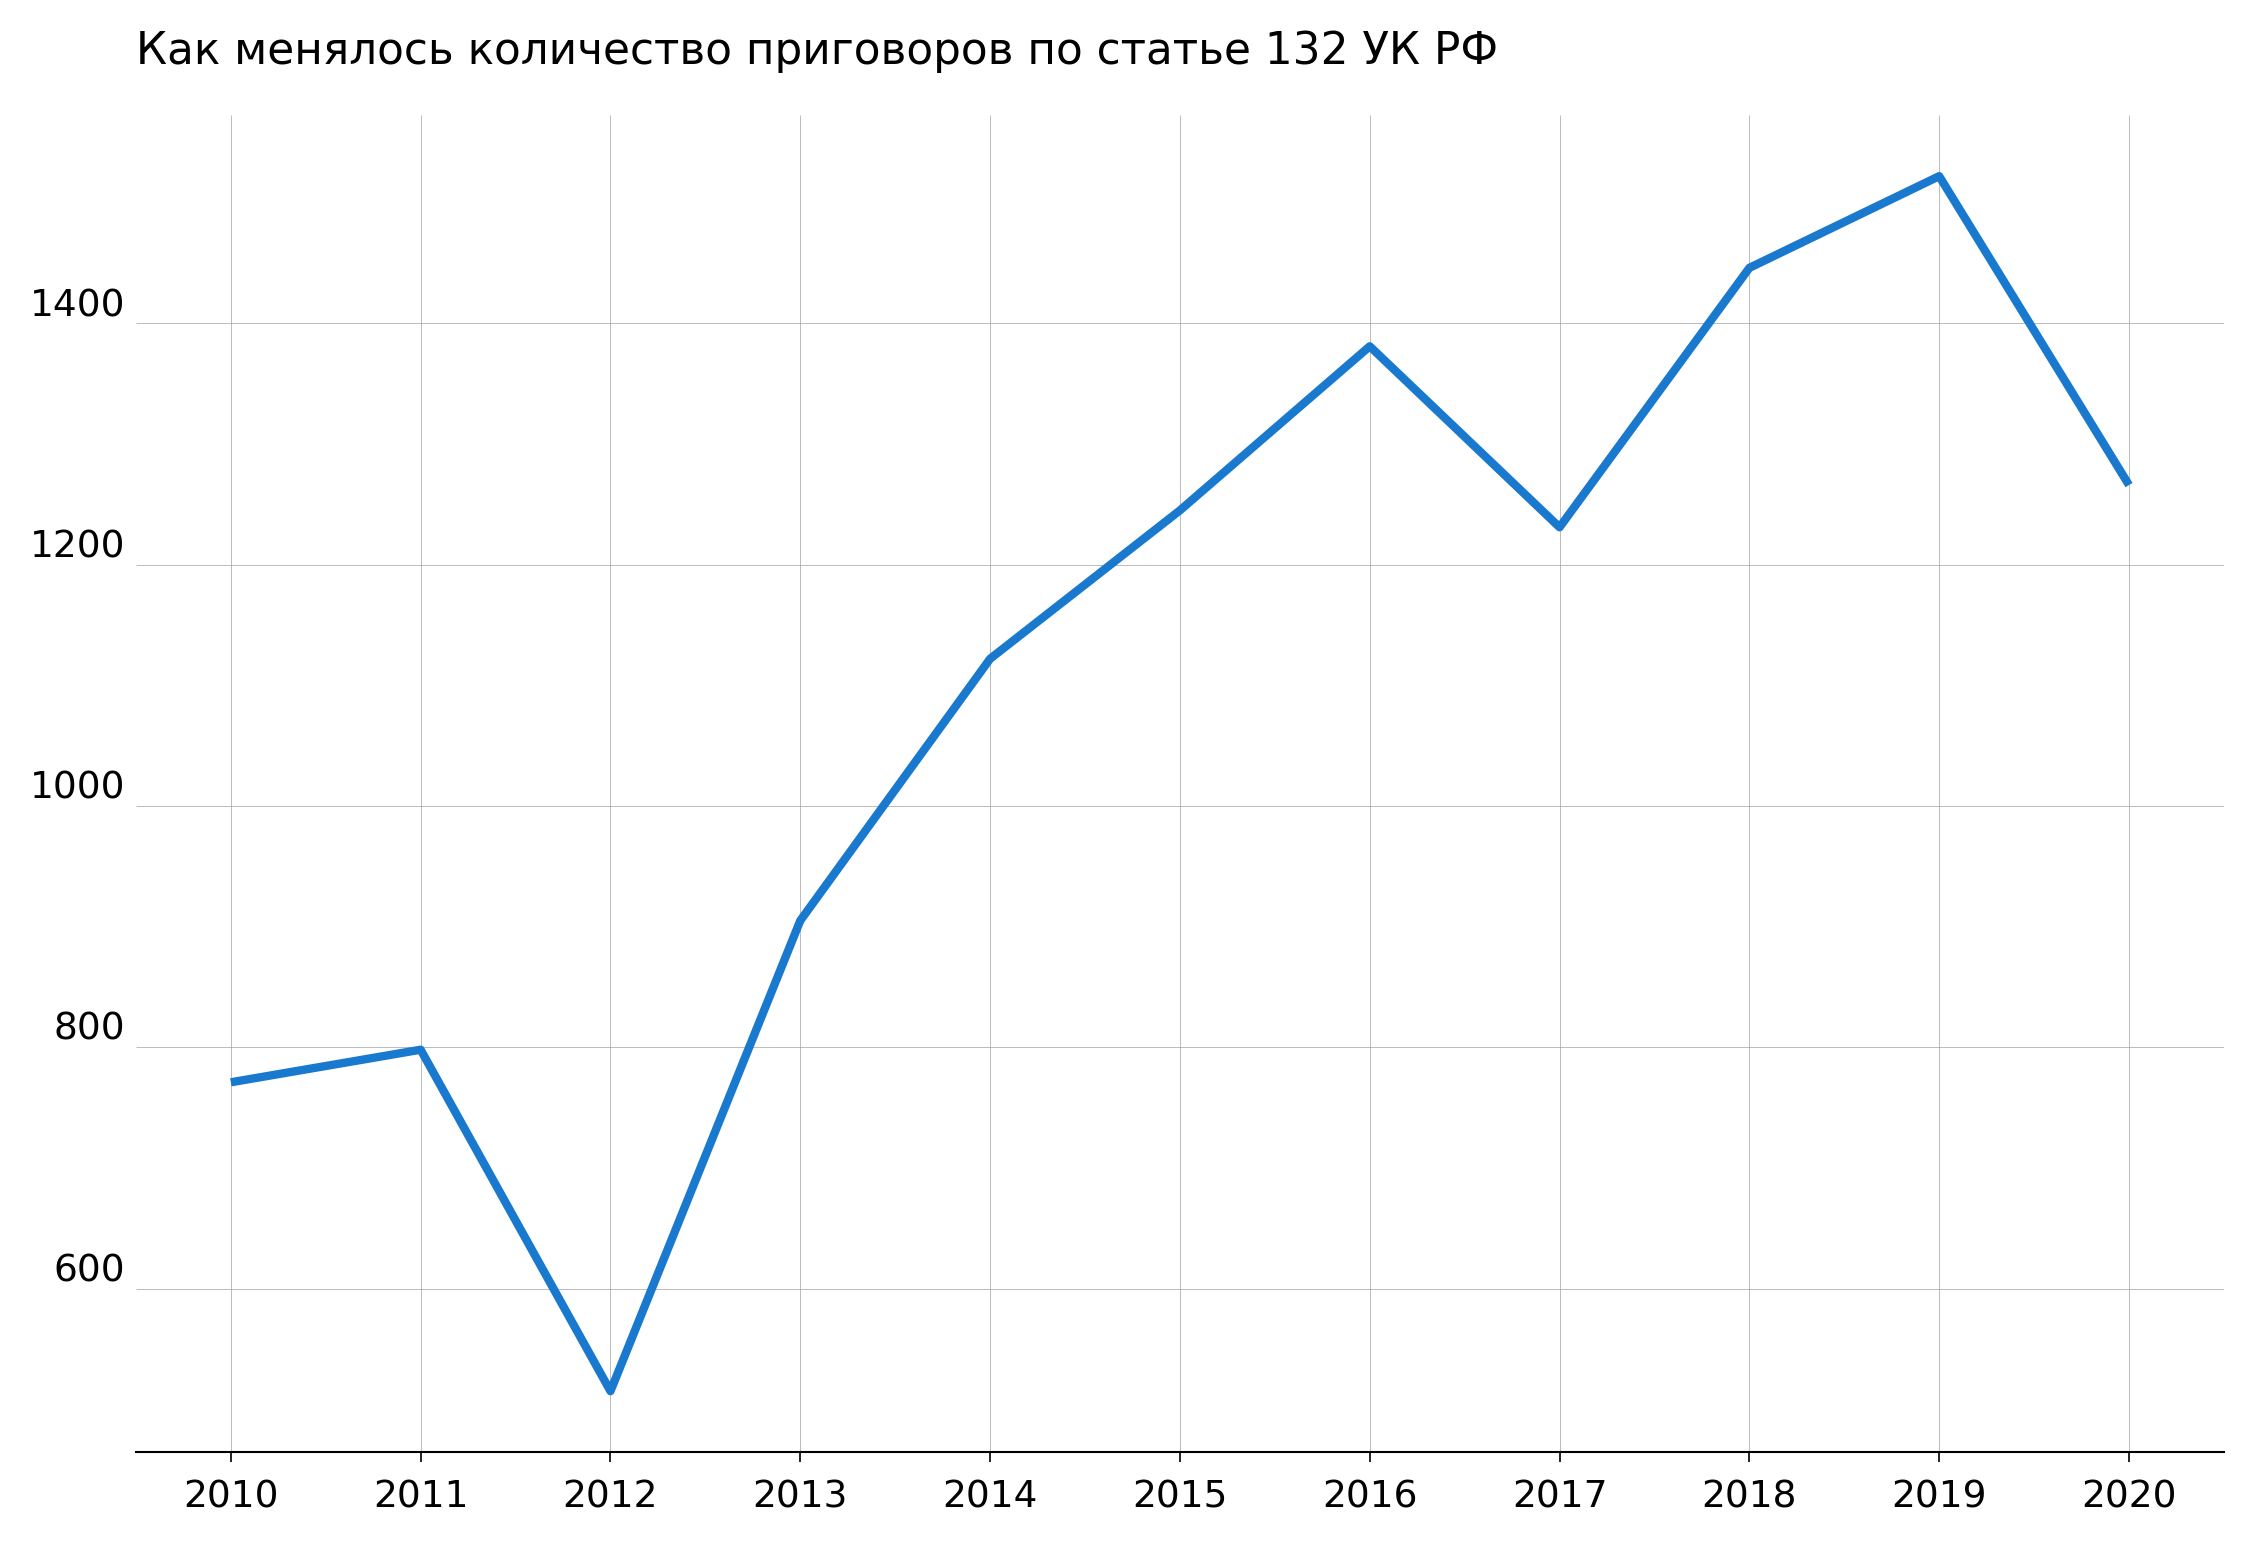

In [108]:
filtered = dostoevsky_data.loc[dostoevsky_data['Статья'].str.contains('132')]
filtered.groupby(['Год'])['Всего осуждено'].sum().plot()
plt.title('Как менялось количество приговоров по статье 132 УК РФ', fontsize=21, fontweight=None)
plt.xticks(range(2010, 2021))
plt.savefig('132.svg')
plt.xlabel(None);

In [10]:
# общая сводная таблица по всем статьям
dostoyevsky_pivot = pd.pivot_table(
            data=dostoevsky_data, 
            index='Статья', 
            columns='Год', 
            values='Всего осуждено',
            aggfunc=np.sum,
#             margins=True
    )
dostoyevsky_pivot

dostoyevsky_pivot = dostoyevsky_pivot.T.reset_index()
dostoyevsky_pivot.columns.name = None
dostoyevsky_pivot = dostoyevsky_pivot.set_index('Год')
dostoyevsky_pivot = dostoyevsky_pivot.loc[2010:]

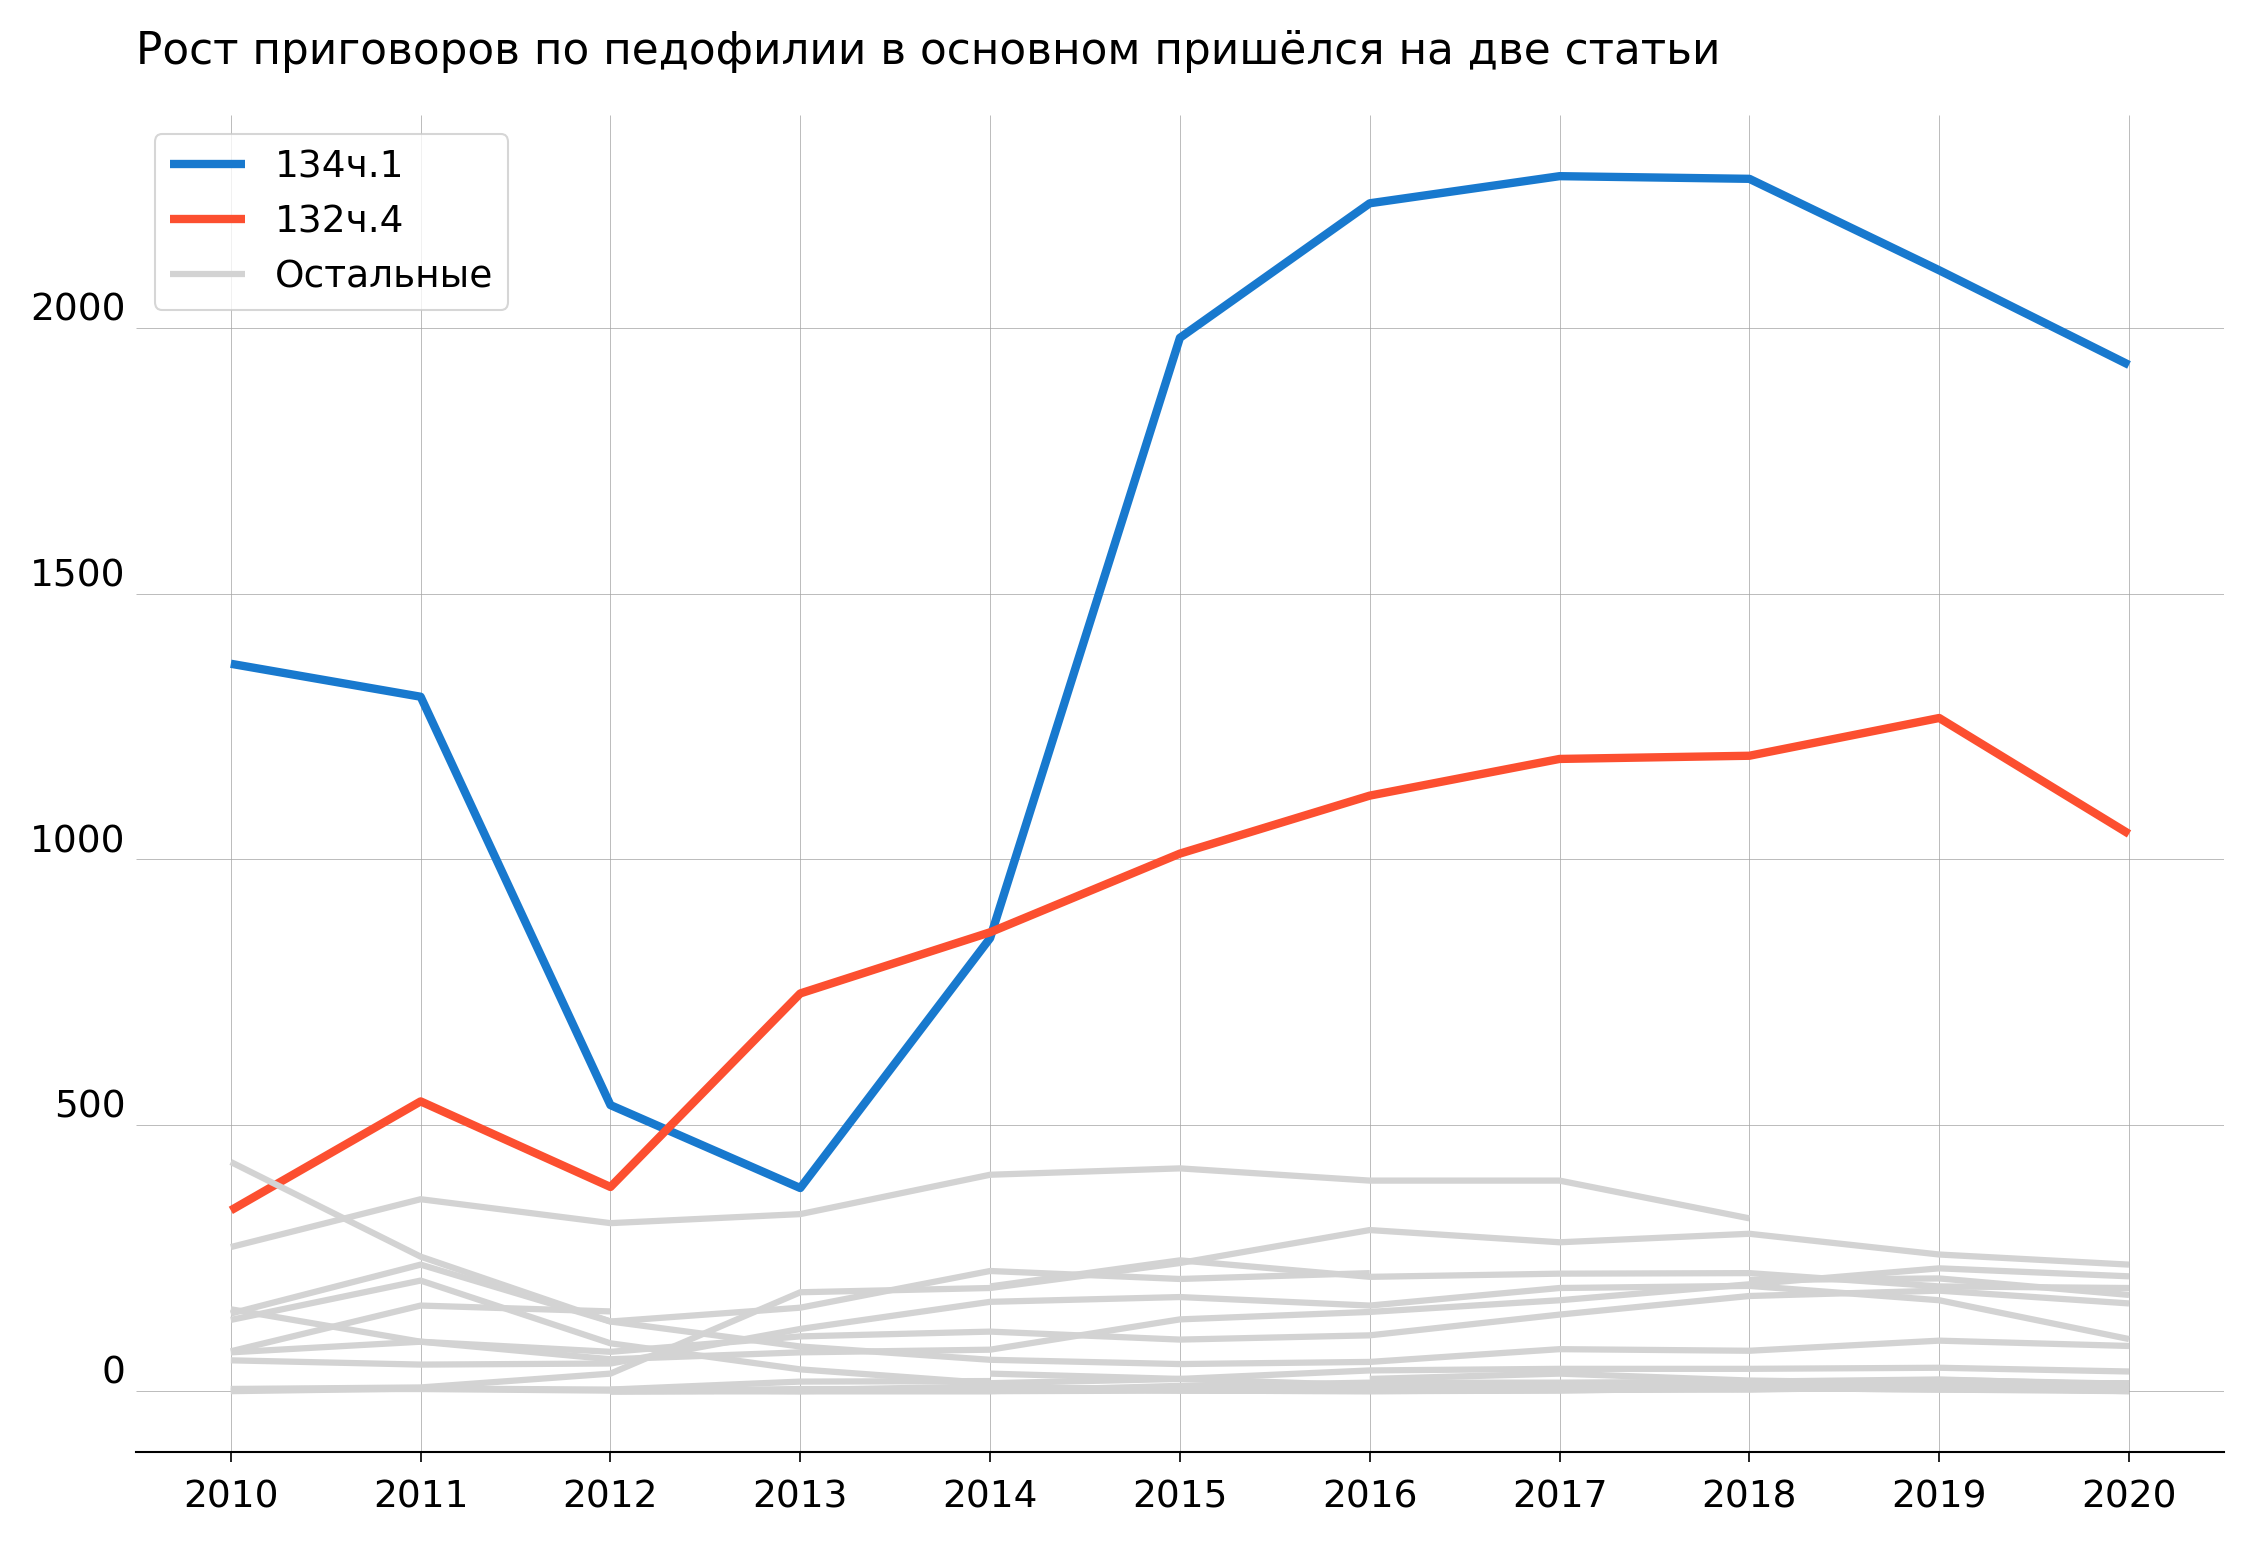

In [109]:
plt.plot(dostoyevsky_pivot[['134ч.1', '132ч.4']])
plt.plot(dostoyevsky_pivot.drop(['134ч.1', '132ч.4'], axis=1), color='lightgrey', linewidth=3)
plt.title('Рост приговоров по педофилии в основном пришёлся на две статьи', fontsize=21, fontweight=None)
plt.legend(['134ч.1', '132ч.4', 'Остальные'])
plt.xticks(range(2010, 2021))
plt.grid(True)

plt.savefig('132_134_others.svg')

In [97]:
# оправдано
acquittal = [
    'Оправдано',
]

# осуждено
convicted = [
    'Пожизненное лишение свободы', 
    'Лишение свободы',
    'Условное осуждение к лишению свободы', 
    'Ограничение свободы',
    'Исправительные работы', 
    'Обязательные работы', 
    'Принудительные работы',
    'Штраф',
    'Лишение права занимать определенные должности или заниматься определенной деятельностью',
    'Условное осуждение к иным мерам',
    'Содержание в дисциплинарной воинской части',
    'Наказание назначено ниже низшего предела: лишение свободы',
]

# Освобождение от наказания
exemption = [
    'Освобождено от наказания Освобождено от наказания: по амнистии',
    'Освобождено от наказания Освобождено от наказания: по другим основаниям: от лишения свободы',
    'Освобождено от наказания Освобождено от наказания: по другим основаниям: от иных мер или наказание не назначалось',
    'Освобождено от наказания по другим основаниям/от лишения свободы',
    'Освобождено от наказания по другим основаниям/от иных мер',
    'Освобождено от наказания в связи с зачетом срока содержания под стражей, домашнего ареста/от лишения свободы',
    'Освобождено от наказания в связи с зачетом срока содержания под стражей, домашнего ареста/от иных мер',
]

# принудительные меры
coercive_measures = [
    'Принудительные меры к невменяемым', 
    'Принудительные меры медицинского характера в отношении невменяемого дополнительная квалификация по судебным постановлениям по количеству составов преступлений',
] 

# судебное производство было прекращено
dismissal = [
    'Прекращено за отсутствием события, состава, непричастностью к преступлению',
    'Прекращено по амнистии', 
    'Прекращено за примирением с потерпевшим',
    'Прекращено в связи с деятельным раскаянием',
    'Прекращено судебный штраф', 
    'Прекращено по другим основаниям',
    'Прекращено по другим основаниям: на основании примечаний к статьям УК РФ (в связи с деятельным раскаянием ч. 2 ст. 28 УПК РФ)',
] 

common_types = [
    'Прекращено по другим основаниям',
    'Лишение свободы',
    'Условное осуждение к лишению свободы',
    'Наказание назначено ниже низшего предела: лишение свободы',
    'Оправдано'
    
    
]

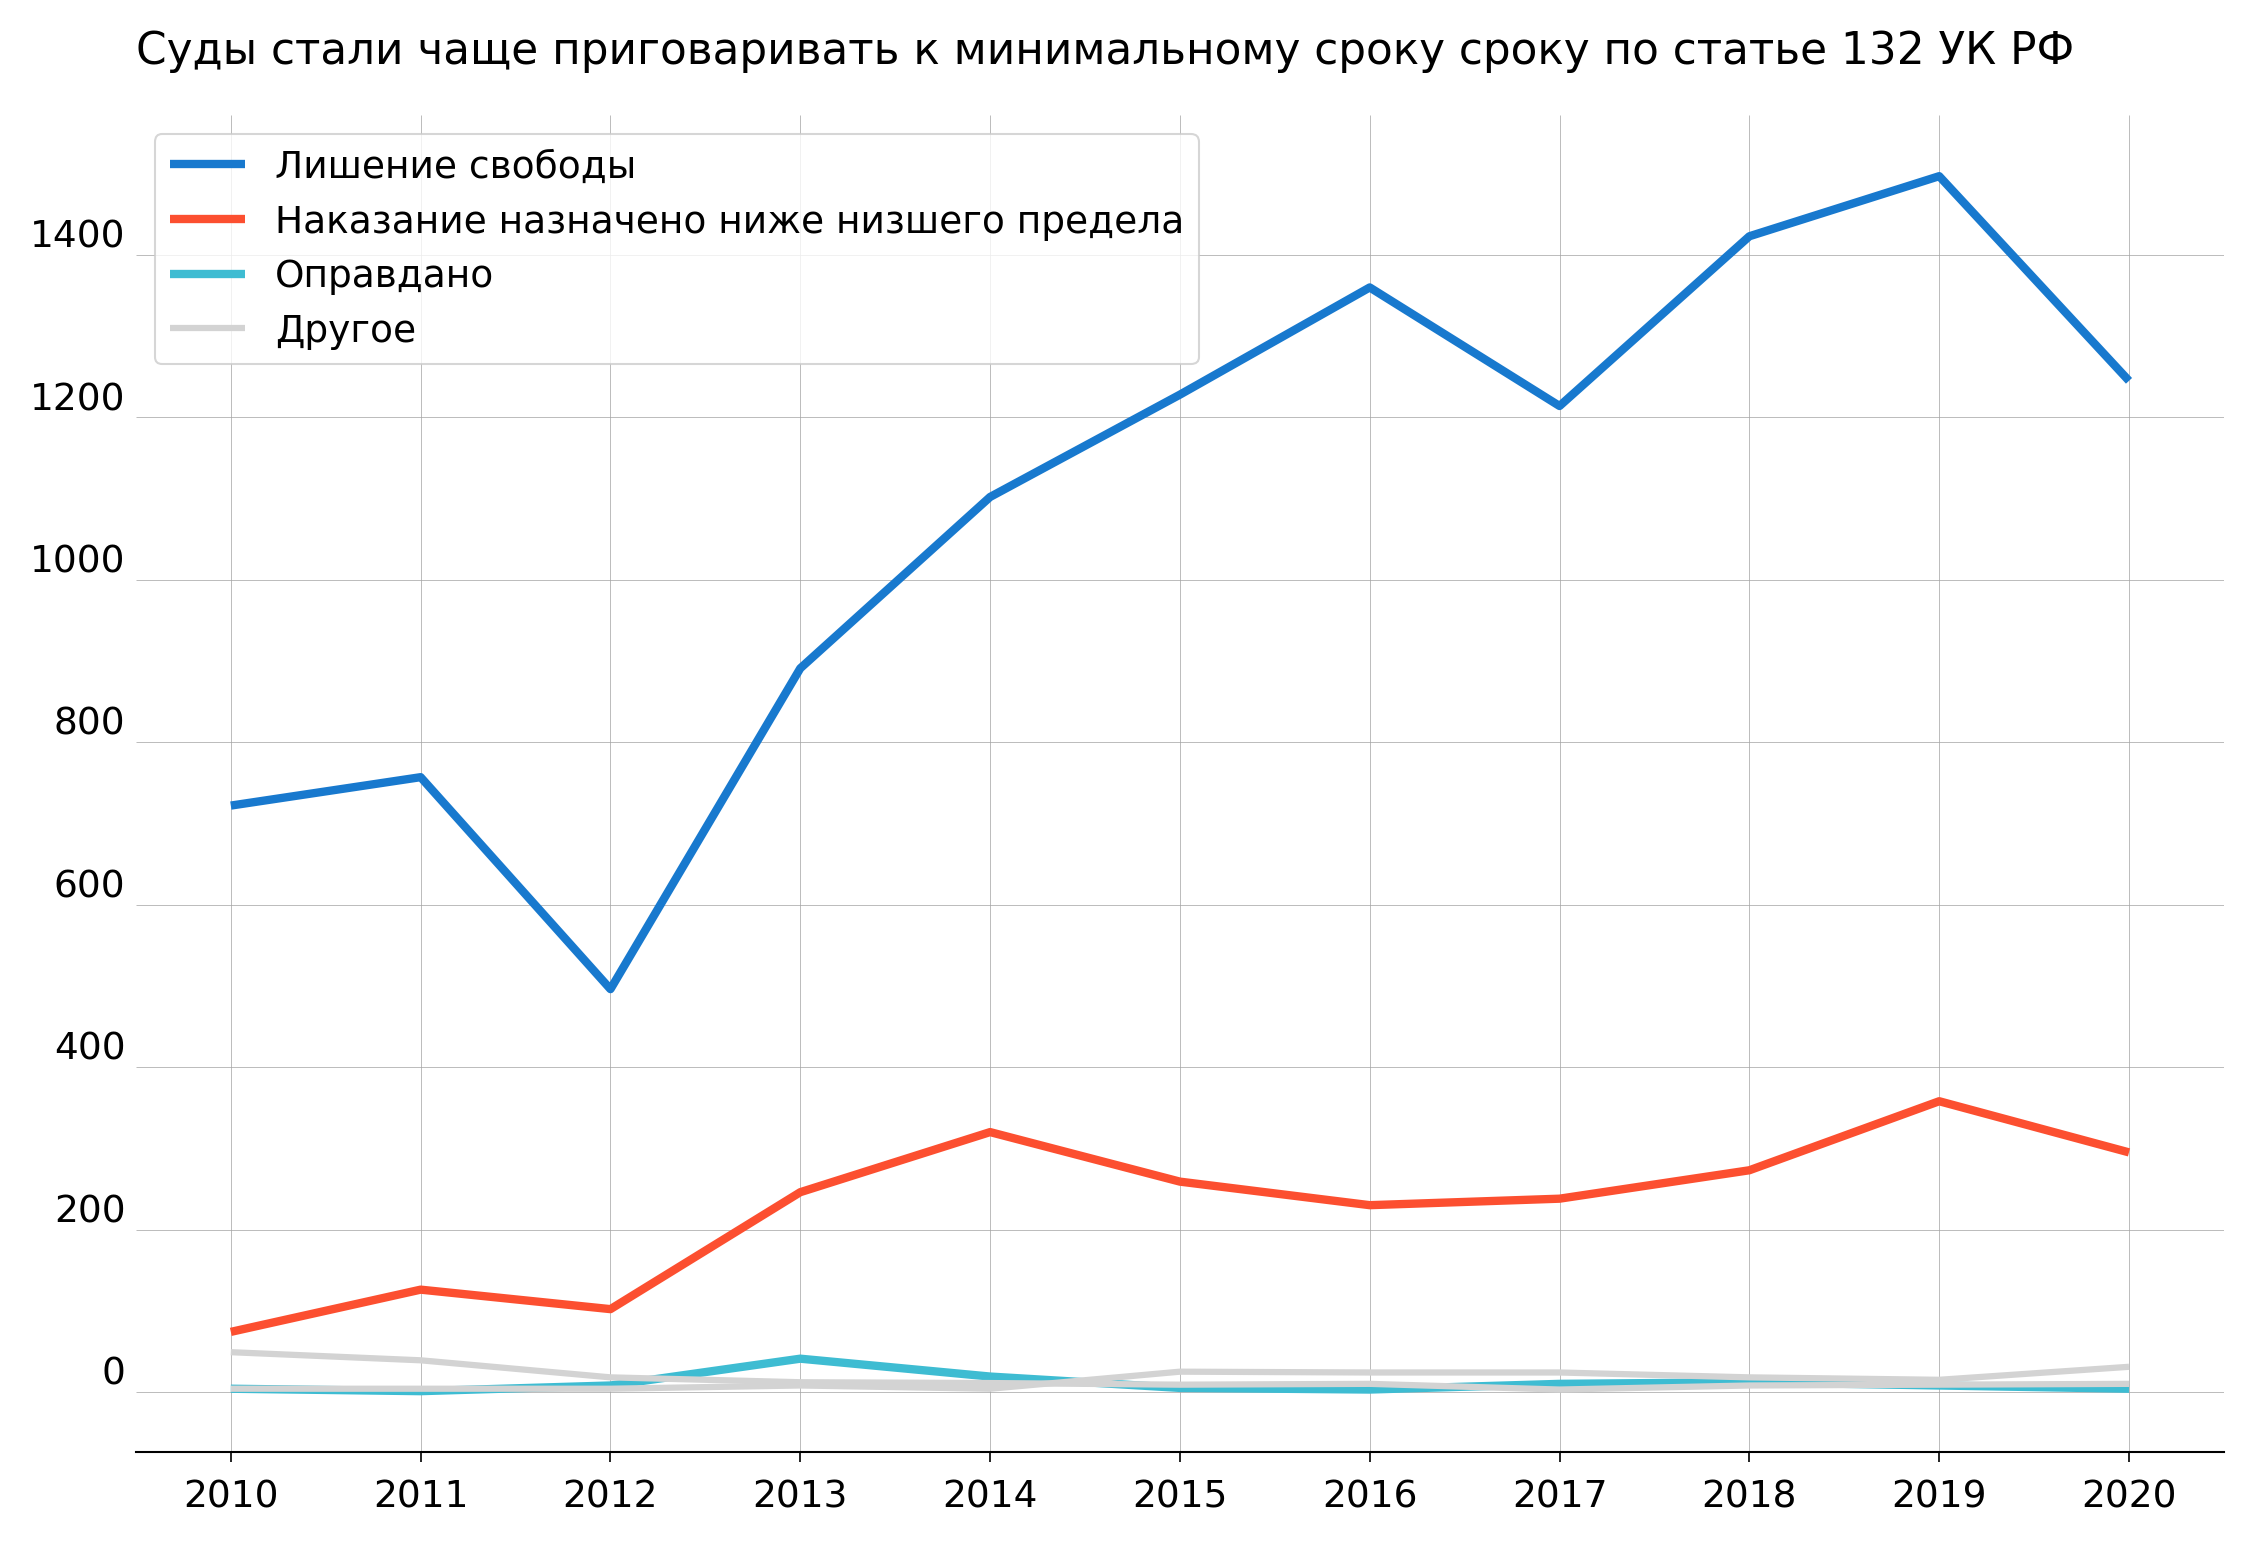

In [110]:
filtered = dostoevsky_data[dostoevsky_data['Статья'].str.contains('132')]
filtered = filtered.groupby(['Год'])[common_types].sum()

plt.plot(filtered[['Лишение свободы', 'Наказание назначено ниже низшего предела: лишение свободы']])
plt.plot(filtered[['Оправдано']])
plt.plot(filtered.drop(columns=['Оправдано', 'Лишение свободы', 'Наказание назначено ниже низшего предела: лишение свободы']), color='lightgray', linewidth=3)

plt.title('Суды стали чаще приговаривать к минимальному сроку сроку по статье 132 УК РФ', fontsize=21, fontweight=None)

plt.legend(['Лишение свободы', 'Наказание назначено ниже низшего предела', 'Оправдано', 'Другое'])


plt.grid(True)
plt.xlabel(None)
plt.xticks(range(2010, 2021));

In [96]:
# filtered = dostoevsky_data[dostoevsky_data['Статья'].str.contains('132')]
# filtered = filtered.groupby(['Год'])[convicted].sum()

# plt.plot(filtered[['Наказание назначено ниже низшего предела: лишение свободы', 
#                                              'Лишение свободы']])

# plt.plot(filtered.drop(columns=['Наказание назначено ниже низшего предела: лишение свободы', 
#                                              'Лишение свободы']), 
#         color='lightgray', linewidth=3)
# plt.xticks(range(2010, 2021))
# plt.title('Суды стали чаще приговаривать к минимальному сроку сроку по статье 132 УК РФ', fontsize=21, fontweight=None)
# plt.legend(['Наказание ниже низжего предела',
#            'Лишение свободы', 'Другое наказание'])
# plt.grid(True)
# plt.xlabel(None)

# plt.savefig('132_min_punishments.svg')

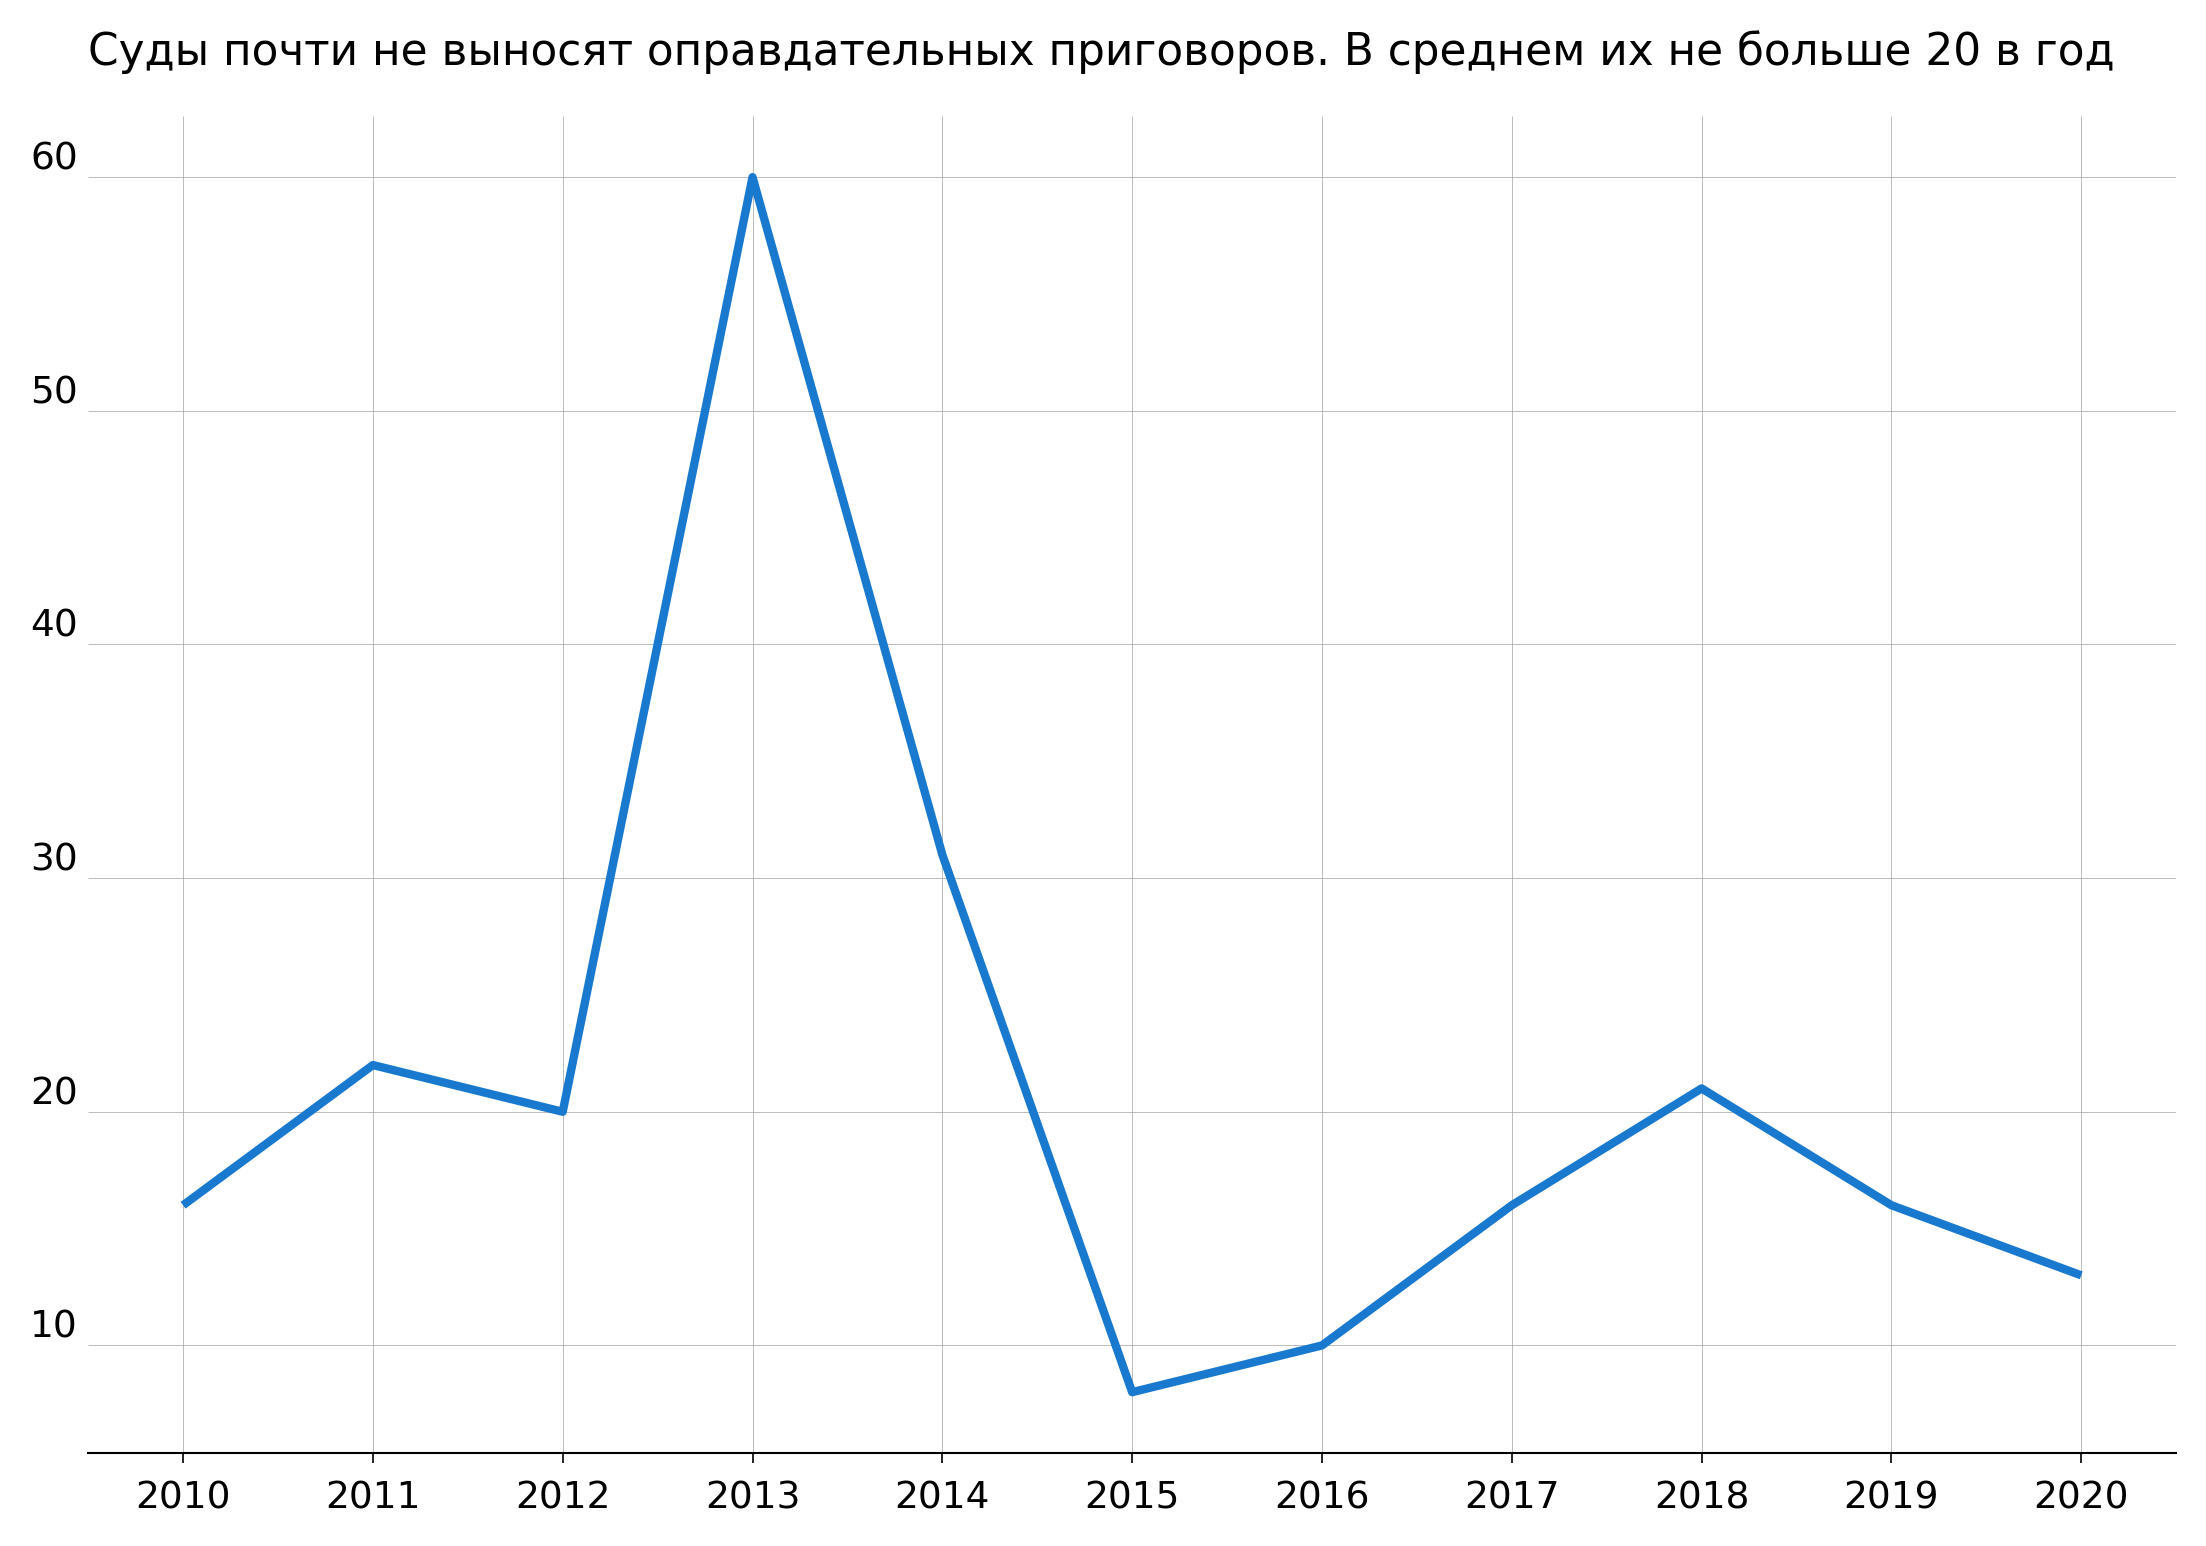

In [124]:
filtered = dostoevsky_data.copy()
filtered = filtered.groupby(['Год'])[common_types].sum()
plt.plot(filtered[['Оправдано']])

plt.title('Суды почти не выносят оправдательных приговоров. В среднем их не больше 20 в год', fontsize=21, fontweight=None)
plt.grid(True)
plt.xlabel(None)
plt.xticks(range(2010, 2021));

In [120]:
dostoevsky_data.groupby('Год')['Всего осуждено'].sum()

Год
2010    3058
2011    3324
2012    1966
2013    2251
2014    3250
2015    4647
2016    5069
2017    5097
2018    5317
2019    4872
2020    4502
Name: Всего осуждено, dtype: int64

In [122]:
20/4000 * 100

0.5